<a href="https://colab.research.google.com/github/bhende27/Proximate-Analysis-of-Coal-Based-on-Spectral-Data-and-a-Convolutional-Neural-Network/blob/master/Complete%20Notebook%20for%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_excel("/content/gdrive/My Drive/BTP/ANN model.xlsx")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Columns: 2107 entries, Wavelength to gross calorific value (MJ/Kg)
dtypes: float64(2106), object(1)
memory usage: 510.4+ KB


In [ ]:
data.head()

,Wavelength,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,...,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,Ash,Moisture,Volatile matter,Fixed carbon,gross calorific value (MJ/Kg)
0,SL-1,1.388611,1.387038,1.408611,1.393487,1.384518,1.413020,1.388354,1.381412,1.402486,1.420802,1.395498,1.379333,1.397551,1.414646,1.401679,1.383798,1.394503,1.407710,1.403113,1.388583,1.399665,1.405428,1.405569,1.407663,1.422252,1.421349,1.411387,1.418465,1.412662,1.412194,1.423916,1.417035,1.421182,1.430832,1.429813,1.426582,1.424409,1.425820,1.433125,...,0.693188,0.696203,0.697885,0.701203,0.702219,0.701365,0.700503,0.698181,0.696683,0.694945,0.692615,0.690305,0.687970,0.684218,0.683468,0.684351,0.684628,0.686481,0.688233,0.690262,0.692744,0.696304,0.697897,0.698106,0.697788,0.696105,0.695717,0.695647,0.696990,0.701527,0.699279,0.694547,0.688977,0.673860,0.670744,18.2254,1.75,28.00,52.0246,29.678162
1,SL-1C (PARTLY JHAMA),1.389465,1.397009,1.396292,1.412123,1.420179,1.401359,1.394125,1.407141,1.414216,1.376158,1.397061,1.425314,1.418520,1.405207,1.413045,1.419446,1.396641,1.405464,1.417735,1.419263,1.419200,1.422979,1.424142,1.418910,1.420702,1.430431,1.437886,1.427841,1.423515,1.422923,1.423858,1.431697,1.438812,1.439932,1.433963,1.436600,1.441211,1.443524,1.444376,...,0.727054,0.725790,0.725648,0.724418,0.723521,0.723494,0.722959,0.721313,0.721956,0.724228,0.723498,0.721991,0.720812,0.717252,0.717207,0.721727,0.722716,0.721822,0.722429,0.722151,0.720962,0.721224,0.720036,0.715216,0.714969,0.717121,0.720446,0.729448,0.732349,0.731787,0.731077,0.727571,0.724782,0.721801,0.718160,12.5500,1.50,40.30,45.6500,28.536035
2,SL-1V,1.356739,1.335754,1.359923,1.359189,1.351261,1.361439,1.361041,1.375428,1.391849,1.374280,1.376947,1.386518,1.387178,1.374821,1.375208,1.384404,1.388959,1.388248,1.388594,1.391828,1.394314,1.392170,1.389100,1.389238,1.393818,1.387721,1.381032,1.396398,1.405706,1.407312,1.404098,1.397246,1.397874,1.401594,1.400111,1.402937,1.405844,1.406359,1.405421,...,0.747420,0.746955,0.745360,0.741610,0.740473,0.740327,0.739344,0.738778,0.740070,0.741775,0.743416,0.747769,0.749074,0.748781,0.747792,0.744640,0.742978,0.739216,0.737507,0.740161,0.740805,0.742036,0.741329,0.736134,0.734639,0.733512,0.732375,0.736643,0.735612,0.730013,0.727557,0.723782,0.722370,0.722833,0.723702,15.0000,1.10,20.20,63.7000,28.673985
3,SL-2,1.363799,1.376159,1.386124,1.370564,1.368878,1.402205,1.372708,1.362322,1.381589,1.395163,1.375047,1.361367,1.374205,1.388502,1.382386,1.370367,1.375465,1.389915,1.388961,1.376254,1.386627,1.389606,1.386964,1.388147,1.404632,1.403754,1.393227,1.403748,1.397865,1.396843,1.409261,1.399975,1.403224,1.413051,1.411119,1.404105,1.404183,1.411431,1.410961,...,0.723548,0.722859,0.722525,0.720136,0.719275,0.720856,0.721350,0.720892,0.720548,0.719762,0.719031,0.719191,0.718632,0.718668,0.717531,0.713339,0.711771,0.710178,0.711159,0.715579,0.717646,0.721647,0.723569,0.721961,0.722898,0.725421,0.725406,0.724376,0.723797,0.723040,0.720234,0.716216,0.714441,0.709453,0.708456,21.6500,1.00,16.62,60.7300,29.927524
4,SL-3,1.411927,1.404876,1.358338,1.370387,1.401116,1.396435,1.386163,1.389444,1.401842,1.403557,1.396959,1.392098,1.395663,1.409785,1.406837,1.395187,1.394079,1.404737,1.411499,1.406953,1.395113,1.392148,1.397900,1.406552,1.407019,1.407715,1.411757,1.417559,1.411945,1.411800,1.421601,1.410743,1.411044,1.418001,1.416967,1.420573,1.423870,1.423418,1.419103,...,0.663432,0.667141,0.667344,0.664810,0.665649,0.667347,0.668762,0.673963,0.674948,0.671269,0.669981,0.669122,0.668608,0.668684,0.669898,0.671665,0.671165,0.670478,0.670078,0.667094,0.668575,0.674743,0.677367,0.680843,0.680968,0.676932,0.674932,0.671764,0.670919,0.671833,0.673398,0.677760,0.677420,0.675211,0.672314,27.3000,0.46,16.88,55.3600,25.4

In [ ]:
At= data['Wavelength']
At

0                     SL-1
1     SL-1C (PARTLY JHAMA)
2                    SL-1V
3                     SL-2
4                     SL-3
5                    SL-3C
6                    SL-3D
7                     SL-4
8                    SL-4C
9                    SL-4V
10                 SL-21/1
11                 SL-21/2
12                 SL-21/3
13                 SL-22/2
14                 SL-22/3
15                 SL-22/4
16                 SL-23/1
17                 SL-23/2
18                 SL-23/3
19                 SL-23/4
20                     M-1
21                     M-2
22                     M-3
23                     M-4
24                     M-5
25                     K-1
26                     K-2
27                     K-3
28                     K-4
29                     K-5
30                     K-6
Name: Wavelength, dtype: object

In [ ]:
data2=data.set_index(At).T
data2.head()

Wavelength,SL-1,SL-1C (PARTLY JHAMA),SL-1V,SL-2,SL-3,SL-3C,SL-3D,SL-4,SL-4C,SL-4V,SL-21/1,SL-21/2,SL-21/3,SL-22/2,SL-22/3,SL-22/4,SL-23/1,SL-23/2,SL-23/3,SL-23/4,M-1,M-2,M-3,M-4,M-5,K-1,K-2,K-3,K-4,K-5,K-6
Wavelength,SL-1,SL-1C (PARTLY JHAMA),SL-1V,SL-2,SL-3,SL-3C,SL-3D,SL-4,SL-4C,SL-4V,SL-21/1,SL-21/2,SL-21/3,SL-22/2,SL-22/3,SL-22/4,SL-23/1,SL-23/2,SL-23/3,SL-23/4,M-1,M-2,M-3,M-4,M-5,K-1,K-2,K-3,K-4,K-5,K-6
400,1.38861,1.38946,1.35674,1.3638,1.41193,1.34389,1.37114,1.43776,1.36601,1.56864,1.61143,1.42313,1.39524,1.58892,1.58734,1.59725,1.63472,1.55909,1.59272,1.6085,1.32209,1.27114,1.28422,1.28265,1.27913,1.27505,1.25629,1.25467,1.36659,1.31287,1.27698
401,1.38704,1.39701,1.33575,1.37616,1.40488,1.34815,1.33727,1.43332,1.36109,1.54821,1.58032,1.4204,1.36939,1.53862,1.57611,1.59712,1.68102,1.59399,1.62025,1.62709,1.31005,1.26647,1.28838,1.29736,1.28348,1.28821,1.24127,1.23583,1.32183,1.29065,1.25703
402,1.40861,1.39629,1.35992,1.38612,1.35834,1.36117,1.35465,1.38573,1.37242,1.5376,1.65616,1.4599,1.41368,1.60646,1.5567,1.56051,1.68395,1.59536,1.66557,1.70499,1.31877,1.27966,1.28986,1.3304,1.32798,1.31316,1.24294,1.2354,1.35176,1.30857,1.26478
403,1.39349,1.41212,1.35919,1.37056,1.37039,1.37377,1.36205,1.38712,1.39256,1.54975,1.64271,1.46046,1.40479,1.61148,1.55077,1.54607,1.66574,1.59412,1.68284,1.68642,1.31342,1.29054,1.29464,1.31156,1.31074,1.30469,1.23801,1.23693,1.36022,1.30684,1.2661


In [ ]:
data2.drop(["Wavelength"], inplace= True)

In [ ]:
X= data2[0:2101]
X.tail()

Wavelength,SL-1,SL-1C (PARTLY JHAMA),SL-1V,SL-2,SL-3,SL-3C,SL-3D,SL-4,SL-4C,SL-4V,SL-21/1,SL-21/2,SL-21/3,SL-22/2,SL-22/3,SL-22/4,SL-23/1,SL-23/2,SL-23/3,SL-23/4,M-1,M-2,M-3,M-4,M-5,K-1,K-2,K-3,K-4,K-5,K-6
2496,0.699279,0.731077,0.727557,0.720234,0.673398,0.642491,0.664369,0.670048,0.73713,0.701728,0.289985,0.229312,0.285704,0.297926,0.273475,0.305884,0.355563,0.326894,0.370177,0.356618,0.851365,0.623985,0.723446,0.819114,0.769819,0.93752,0.598573,0.58011,0.833493,0.659309,0.666468
2497,0.694547,0.727571,0.723782,0.716216,0.67776,0.64275,0.667913,0.67056,0.741683,0.698923,0.287485,0.226662,0.283464,0.296222,0.271384,0.304315,0.358103,0.327858,0.373135,0.358984,0.856164,0.624449,0.721496,0.814784,0.76685,0.924344,0.596298,0.577797,0.837012,0.660597,0.661451
2498,0.688977,0.724782,0.72237,0.714441,0.67742,0.644609,0.670548,0.669499,0.743735,0.696083,0.288361,0.225779,0.281939,0.296143,0.270484,0.304361,0.359481,0.32813,0.374322,0.358768,0.858914,0.624852,0.719817,0.810158,0.762073,0.922011,0.596007,0.578549,0.837536,0.658795,0.659423
2499,0.67386,0.721801,0.722833,0.709453,0.675211,0.649084,0.673956,0.663738,0.743902,0.686003,0.29271,0.227582,0.281594,0.298925,0.26948,0.306855,0.361262,0.327424,0.373795,0.358108,0.860971,0.622987,0.720115,0.804723,0.752429,0.922086,0.596929,0.578881,0.83991,0.655027,0.656466
2500,0.670744,0.71816,0.723702,0.708456,0.672314,0.649438,0.673929,0.662675,0.7445,0.682541,0.294045,0.227766,0.281644,0.29946,0.268239,0.307019,0.362149,0.32745,0.37334,0.358217,0.860147,0.621654,0.719077,0.803911,0.750608,0.92155,0.596399,0.580301,0.837275,0.653013,0.655331


In [ ]:
y= data2[2101:]
y.head()

Wavelength,SL-1,SL-1C (PARTLY JHAMA),SL-1V,SL-2,SL-3,SL-3C,SL-3D,SL-4,SL-4C,SL-4V,SL-21/1,SL-21/2,SL-21/3,SL-22/2,SL-22/3,SL-22/4,SL-23/1,SL-23/2,SL-23/3,SL-23/4,M-1,M-2,M-3,M-4,M-5,K-1,K-2,K-3,K-4,K-5,K-6
Ash,18.2254,12.55,15,21.65,27.3,29.32,41.65,19.31,14.53,14.34,20.27,9.86,32.31,5.57,5.99,7.8,7.96,12.96,6.88,8.44,19.8,14.87,26.01,14.4,14.42,25.15,19.32,17.63,41.06,32.1,31.24
Moisture,1.75,1.5,1.1,1,0.46,0.82,0.71,6.9,9.2,12.14,9.38,8.7,8.33,20.21,30.45,14.08,33.07,23.69,31.53,29.81,0.45,0.91,0.32,0.41,0.41,0.23,0.57,0.23,0.24,0.3,0.4
Volatile matter,28,40.3,20.2,16.62,16.88,18.87,16.19,25.03,28.43,29.56,38.25,47.86,32.84,17.91,9.07,26.58,-0.54,19.82,1.08,2.51,16.46,15.45,14.05,15.92,15.04,13.34,13.37,13.07,13.55,11.21,11.91
Fixed carbon,52.0246,45.65,63.7,60.73,55.36,50.99,41.45,48.76,47.84,43.96,32.1,33.58,26.52,56.31,54.49,51.54,59.51,43.53,60.51,59.24,63.29,68.77,59.62,69.27,70.13,61.28,66.74,69.07,45.15,56.39,56.45
gross calorific value (MJ/Kg),29.6782,28.536,28.674,29.9275,25.4536,25.3708,25.1489,23.3664,24.0281,25.3747,21.4459,26.0846,17.5347,21.0304,19.3729,21.6556,16.7043,18.3439,17.2951,18.1114,29.4791,31.1723,24.5634,29.8094,30.4764,25.8863,26.6102,27.0439,17.1283,17.5615,20.1721


In [ ]:
Y=y.T
Y.head()

,Ash,Moisture,Volatile matter,Fixed carbon,gross calorific value (MJ/Kg)
Wavelength,,,,,
SL-1,18.2254,1.75,28,52.0246,29.6782
SL-1C (PARTLY JHAMA),12.55,1.5,40.3,45.65,28.536
SL-1V,15,1.1,20.2,63.7,28.674
SL-2,21.65,1,16.62,60.73,29.9275
SL-3,27.3,0.46,16.88,55.36,25.4536


In [ ]:
X.columns

Index(['SL-1', 'SL-1C (PARTLY JHAMA)', 'SL-1V', 'SL-2', 'SL-3', 'SL-3C',
       'SL-3D', 'SL-4', 'SL-4C', 'SL-4V', 'SL-21/1', 'SL-21/2', 'SL-21/3',
       'SL-22/2', 'SL-22/3', 'SL-22/4', 'SL-23/1', 'SL-23/2', 'SL-23/3',
       'SL-23/4', 'M-1', 'M-2', 'M-3', 'M-4', 'M-5', 'K-1', 'K-2', 'K-3',
       'K-4', 'K-5', 'K-6'],
      dtype='object', name='Wavelength')

In [ ]:
 from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(X.T, Y, test_size = 0.2, random_state = 0)

In [ ]:
Wavelength= range(400,2501)

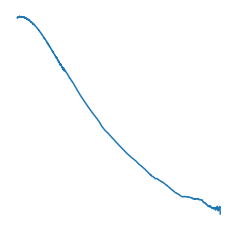

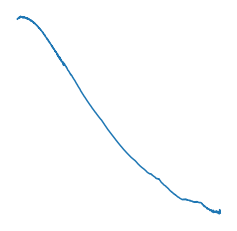

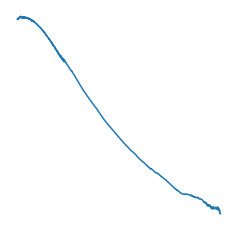

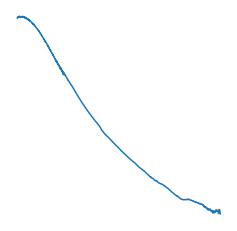

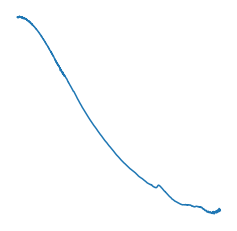

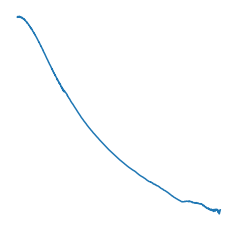

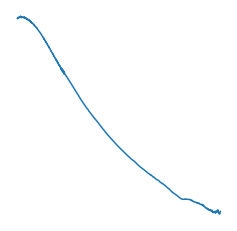

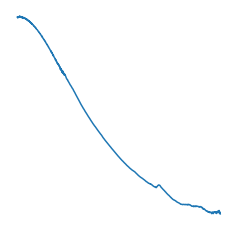

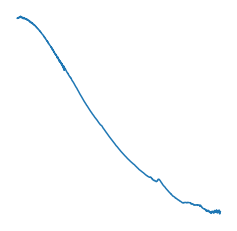

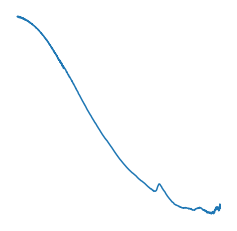

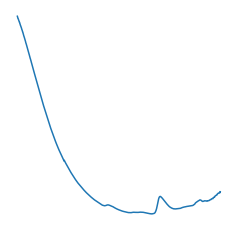

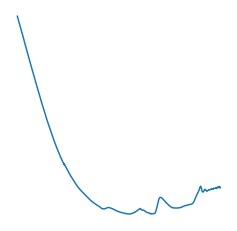

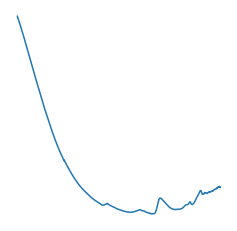

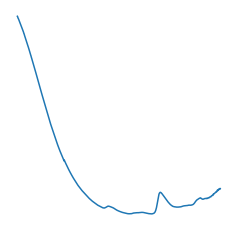

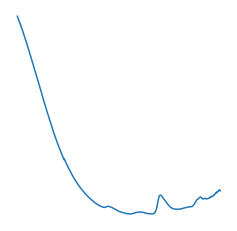

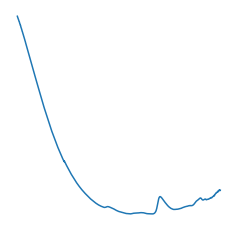

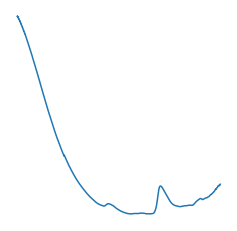

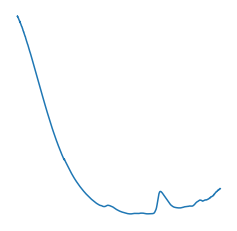

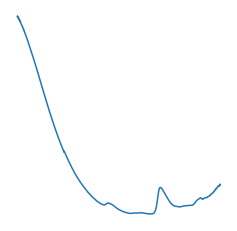

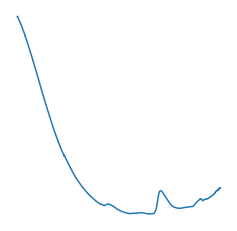

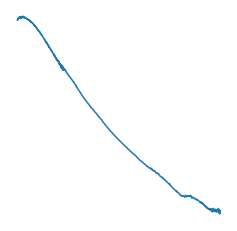

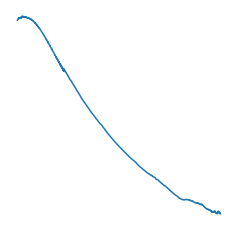

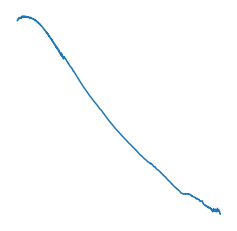

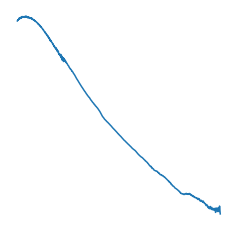

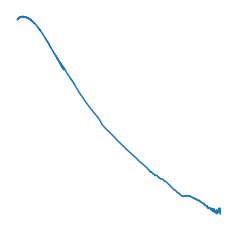

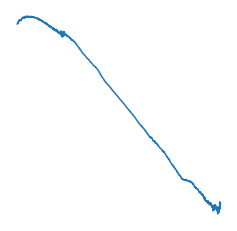

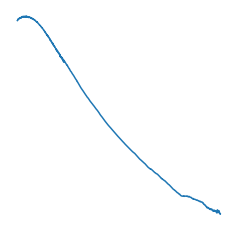

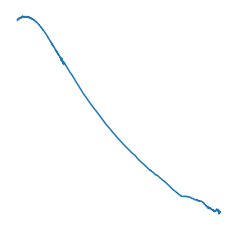

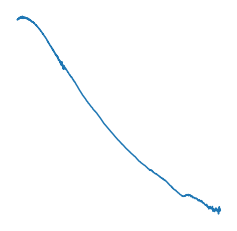

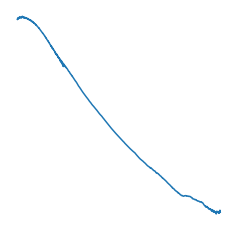

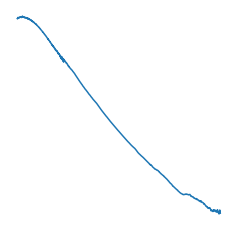

In [ ]:
from google.colab import files
column=X.columns[0:]
j=1
for i in column:  
    plt.figure(figsize=(4,4))
    plt.plot(range(550,2501), X[i][150:], markersize=0.2)
    #plt.xticks(np.arange(400, 2501, 300))
    plt.axis('off')
    plt.savefig('/content/gdrive/My Drive/BTP/'+ str(j)+".png")
    #files.download( str(j) +".png")
    plt.show()
    j= j+1

In [ ]:
import cv2
image=[]
for i in range (1,32):
    fname= '/content/gdrive/My Drive/pat(1)/pat/patch'+str(i)+ ".tiff"
    img= cv2.imread(fname)
    image.append(img)

In [ ]:
image[0].shape

(288, 288, 3)

In [ ]:
imdata= np.array(image)
imdata.shape

(31, 288, 288, 3)

In [ ]:
Y.head()

,Ash,Moisture,Volatile matter,Fixed carbon,gross calorific value (MJ/Kg)
Wavelength,,,,,
SL-1,18.2254,1.75,28,52.0246,29.6782
SL-1C (PARTLY JHAMA),12.55,1.5,40.3,45.65,28.536
SL-1V,15,1.1,20.2,63.7,28.674
SL-2,21.65,1,16.62,60.73,29.9275
SL-3,27.3,0.46,16.88,55.36,25.4536


In [ ]:
Y.shape

(31, 5)

In [ ]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imdata, Y, test_size = 0.2, random_state = 0)

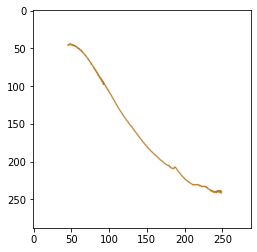

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(X_train[5])
plt.savefig("check.png")

In [ ]:
temp= y_test

# Training on Simple **ANN**

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from matplotlib.pyplot import imshow
%matplotlib inline
from keras.optimizers import Adam
import keras.backend as K
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
 
# Initialising the ANN
classifier = Sequential()
 
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 1024, kernel_initializer = 'uniform', activation = 'relu', input_dim =2101 ))
 
# Adding the second hidden layer
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
 
# Adding the output layer
classifier.add(Dense(units =5, kernel_initializer = 'uniform', activation = 'linear'))
 
# Compiling the ANN
classifier.compile(optimizer = Adam(lr=0.0001), loss = 'mse', metrics = ['accuracy'])
 
# Fitting the ANN to the Training set
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              2152448   
_________________________________________________________________
dense_37 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 645       
Total params: 2,743,557
Trainable params: 2,743,557
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(data_train, y_train, batch_size = 6, epochs = 150)

Epoch 1/150
24/24 [==============================] - 0s 5ms/step - loss: 932.4257 - accuracy: 0.7083
Epoch 2/150
24/24 [==============================] - 0s 867us/step - loss: 913.6402 - accuracy: 0.8750
Epoch 3/150
24/24 [==============================] - 0s 851us/step - loss: 889.7517 - accuracy: 0.8750
Epoch 4/150
24/24 [==============================] - 0s 797us/step - loss: 858.2117 - accuracy: 0.8750
Epoch 5/150
24/24 [==============================] - 0s 828us/step - loss: 816.3614 - accuracy: 0.8750
Epoch 6/150
24/24 [==============================] - 0s 967us/step - loss: 760.5301 - accuracy: 0.8750
Epoch 7/150
24/24 [==============================] - 0s 952us/step - loss: 689.1929 - accuracy: 0.8750
Epoch 8/150
24/24 [==============================] - 0s 858us/step - loss: 601.8912 - accuracy: 0.8750
Epoch 9/150
24/24 [==============================] - 0s 885us/step - loss: 492.8213 - accuracy: 0.8750
Epoch 10/150
24/24 [==============================] - 0s 891us/step - loss:

In [ ]:
y_pred = classifier.predict(data_test)
y_pred

array([[22.885214  ,  1.8251219 , 20.708754  , 56.609863  , 27.146387  ],
       [21.339537  ,  1.972269  , 19.378855  , 53.02099   , 25.378551  ],
       [11.309871  , 25.101994  , 16.729536  , 51.116516  , 19.493675  ],
       [11.379325  , 24.383253  , 16.567547  , 50.574978  , 19.450869  ],
       [20.181364  ,  2.2721095 , 18.427671  , 50.49317   , 24.097113  ],
       [24.363745  ,  0.11273719, 21.636684  , 58.61947   , 28.415644  ],
       [22.205046  ,  1.4660349 , 20.016848  , 54.661095  , 26.265232  ]],
      dtype=float32)

In [ ]:
y_test= temp
y_test= y_test.iloc[0:,0:].values
y_test

array([[15.0, 1.1, 20.2, 63.7, 28.6739845068],
       [32.1, 0.3, 11.209999999999999, 56.39, 17.561514839799997],
       [5.57, 20.21, 17.909999999999997, 56.31, 21.030398282799997],
       [20.27, 9.38, 38.25, 32.099999999999994, 21.4459107197],
       [17.63, 0.23, 13.07, 69.07, 27.0438711017],
       [25.15, 0.23, 13.34, 61.28, 25.886266089699998],
       [26.01, 0.32, 14.049999999999999, 59.62, 24.563413586099998]],
      dtype=object)

In [ ]:
import sklearn.metrics
import math
r2_score=sklearn.metrics.r2_score(y_test,y_pred)
meansqerr =math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R2_score= %f" %(r2_score))
print("Root_Mean Square error= %f" %(meansqerr))

R2_score= 0.072623
Root_Mean Square error= 7.811176


<Figure size 288x288 with 0 Axes>

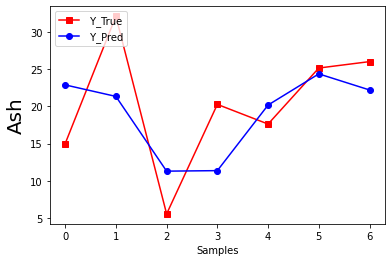

<Figure size 288x288 with 0 Axes>

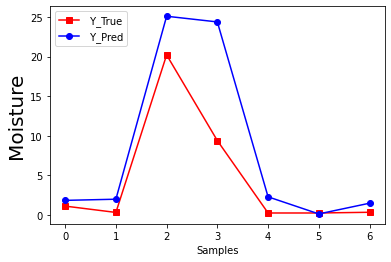

<Figure size 288x288 with 0 Axes>

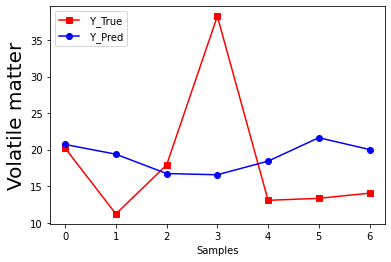

<Figure size 288x288 with 0 Axes>

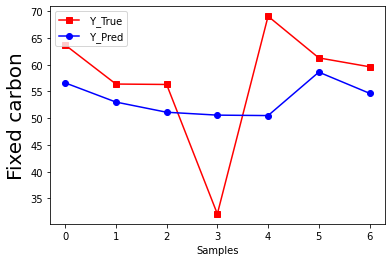

<Figure size 288x288 with 0 Axes>

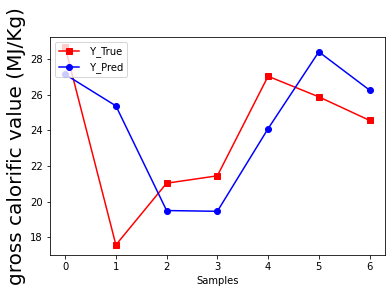

In [ ]:
j=0
for i in Y.columns:
            fig = plt.figure(figsize=(4,4))
            plt.show()       
            plt.plot(np.arange(0,7,1), y_test[0:,j], "-ok", color="r", marker="s", label=" Y_True")
            plt.plot(np.arange(0,7,1), y_pred[0:,j], "-ok", color="b",  marker="o", label=" Y_Pred")
            plt.legend(loc='upper left')
            plt.xlabel("Samples")
            plt.ylabel(i,size=20)
            j= j+1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
regr = RandomForestRegressor(max_depth=20, random_state=None, n_estimators=30)
regr.fit(data_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=regr.predict(data_test)
y_pred

array([[24.8849    ,  1.17933333, 21.58366667, 52.3521    , 26.81726173],
       [15.81      ,  0.965     , 15.54366667, 67.68133333, 30.21052347],
       [ 8.54366667, 25.482     , 14.45933333, 51.515     , 19.45759157],
       [ 9.02866667, 26.17333333, 13.25733333, 51.54066667, 19.05624106],
       [26.13566667,  0.91      , 14.038     , 58.91633333, 23.4656672 ],
       [21.39284667,  0.47766667, 16.22566667, 61.90382   , 27.85293141],
       [16.06833333,  0.611     , 15.71466667, 67.606     , 30.27975351]])

In [ ]:
y_test= temp
y_test= y_test.iloc[0:,0:].values
y_test

array([[15.0, 1.1, 20.2, 63.7, 28.6739845068],
       [32.1, 0.3, 11.209999999999999, 56.39, 17.561514839799997],
       [5.57, 20.21, 17.909999999999997, 56.31, 21.030398282799997],
       [20.27, 9.38, 38.25, 32.099999999999994, 21.4459107197],
       [17.63, 0.23, 13.07, 69.07, 27.0438711017],
       [25.15, 0.23, 13.34, 61.28, 25.886266089699998],
       [26.01, 0.32, 14.049999999999999, 59.62, 24.563413586099998]],
      dtype=object)

In [ ]:
r2_score=sklearn.metrics.r2_score(y_test,y_pred)
meansqerr =math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R2_score= %f" %(r2_score))
print("Root_Mean Square error= %f" %(meansqerr))

R2_score= -0.418696
Root_Mean Square error= 8.797991


<Figure size 288x288 with 0 Axes>

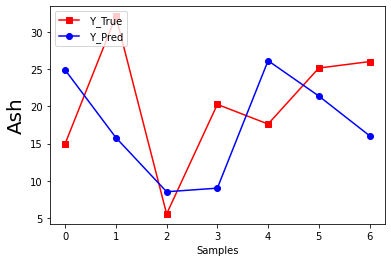

<Figure size 288x288 with 0 Axes>

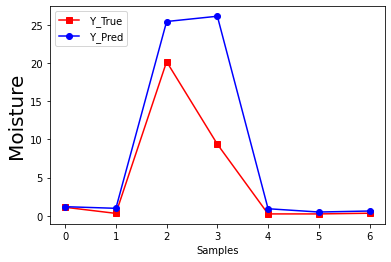

<Figure size 288x288 with 0 Axes>

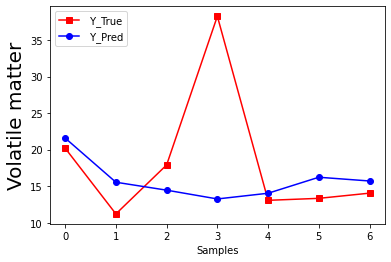

<Figure size 288x288 with 0 Axes>

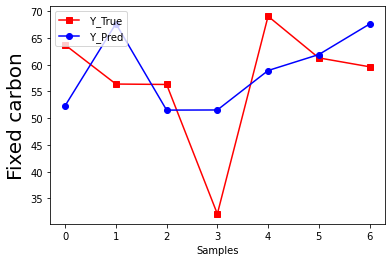

<Figure size 288x288 with 0 Axes>

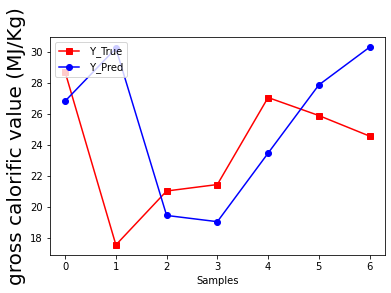

In [ ]:
j=0
for i in Y.columns:
            fig = plt.figure(figsize=(4,4))
            plt.show()       
            plt.plot(np.arange(0,7,1), y_test[0:,j], "-ok", color="r", marker="s", label=" Y_True")
            plt.plot(np.arange(0,7,1), y_pred[0:,j], "-ok", color="b",  marker="o", label=" Y_Pred")
            plt.legend(loc='upper left')
            plt.xlabel("Samples")
            plt.ylabel(i,size=20)
            j= j+1

# **Building A deep Convolutional Neural Network(InceptionV3)**

In [ ]:
base_model = InceptionV3(weights=None, include_top=False, input_shape= (288,288,3))
 
X = Conv2D(96,(3, 3), strides = (1, 1))(base_model.get_layer('mixed10').output)
X = BatchNormalization(axis = 3)(X)
X = Activation('relu')(X)
X=  Flatten()(X)
X = Dense(5, activation='linear')(X)
 
model= Model(base_model.input, outputs=X)
model.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 288, 288, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1236 (Conv2D)            (None, 143, 143, 32) 864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1236 (Batch (None, 143, 143, 32) 96          conv2d_1236[0][0]                
__________________________________________________________________________________________________
activation_1236 (Activation)    (None, 143, 143, 32) 0           batch_normalization_1236[0][0]   
___________________________________________________________________________________________

In [ ]:
#X_train1 = X_train/255.
#X_test1 = X_test/255.

In [ ]:
log_dir= '/content/gdrive/My Drive/BTP/'
logging = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}.h5',
       monitor='loss', save_weights_only=True, save_best_only=True, period=40)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=6, verbose=1)
M= model.fit(X_train, y_train, epochs =200, batch_size = 12, callbacks=[logging, checkpoint, reduce_lr])
model.save_weights(log_dir + 'trained_weights_final.h5')

Epoch 1/200
24/24 [==============================] - 24s 995ms/step - loss: 783.1553 - accuracy: 0.5417


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (1.931274). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 2/200
24/24 [==============================] - 1s 27ms/step - loss: 389.1488 - accuracy: 0.8750
Epoch 3/200
24/24 [==============================] - 1s 25ms/step - loss: 260.7271 - accuracy: 0.8750
Epoch 4/200
24/24 [==============================] - 1s 25ms/step - loss: 183.2971 - accuracy: 0.8750
Epoch 5/200
24/24 [==============================] - 1s 25ms/step - loss: 141.7256 - accuracy: 0.8750
Epoch 6/200
24/24 [==============================] - 1s 25ms/step - loss: 113.8275 - accuracy: 0.8750
Epoch 7/200
24/24 [==============================] - 1s 25ms/step - loss: 96.3277 - accuracy: 0.8750
Epoch 8/200
24/24 [==============================] - 1s 25ms/step - loss: 81.0661 - accuracy: 0.8750
Epoch 9/200
24/24 [==============================] - 1s 25ms/step - loss: 73.9463 - accuracy: 0.8750
Epoch 10/200
24/24 [==============================] - 1s 25ms/step - loss: 63.3340 - accuracy: 0.8750
Epoch 11/200
24/24 [==============================] - 1s 25ms/step - loss: 61.5920 - 

Text(0.5, 1.0, 'Loss_Curve')

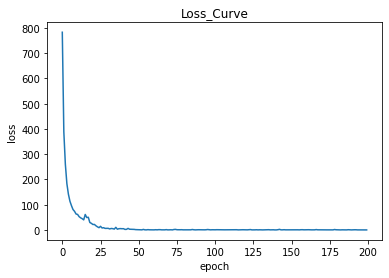

In [ ]:
plt.plot(M.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss_Curve')

In [ ]:
#model.load_weights('/content/gdrive/My Drive/BTP/trained_weights_final1.h5')
y_pred= model.predict(X_test)
y_pred

array([[19.29296   ,  1.6331037 , 15.221642  , 61.47124   , 26.039797  ],
       [26.64088   ,  0.26257363, 13.915382  , 55.560444  , 23.099592  ],
       [10.296618  , 21.81146   , 22.110065  , 45.24025   , 19.30878   ],
       [15.136136  , 12.756549  , 37.705807  , 34.02986   , 21.279984  ],
       [20.740906  ,  1.787612  , 16.582123  , 59.10567   , 25.758163  ],
       [17.68149   ,  3.8972032 , 16.255833  , 43.598705  , 19.823488  ],
       [28.77978   ,  0.49034062, 15.41969   , 53.34575   , 21.75234   ]],
      dtype=float32)

In [ ]:
y_test= temp
y_test= y_test.iloc[0:,0:].values
y_test

array([[15.0, 1.1, 20.2, 63.7, 28.6739845068],
       [32.1, 0.3, 11.209999999999999, 56.39, 17.561514839799997],
       [5.57, 20.21, 17.909999999999997, 56.31, 21.030398282799997],
       [20.27, 9.38, 38.25, 32.099999999999994, 21.4459107197],
       [17.63, 0.23, 13.07, 69.07, 27.0438711017],
       [25.15, 0.23, 13.34, 61.28, 25.886266089699998],
       [26.01, 0.32, 14.049999999999999, 59.62, 24.563413586099998]],
      dtype=object)

In [ ]:
r2_score=sklearn.metrics.r2_score(y_test,y_pred)
meansqerr =math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R2_score= %f" %(r2_score))
print("Root_Mean Square error= %f" %(meansqerr))

R2_score= 0.549314
Root_Mean Square error= 5.190870


<Figure size 288x288 with 0 Axes>

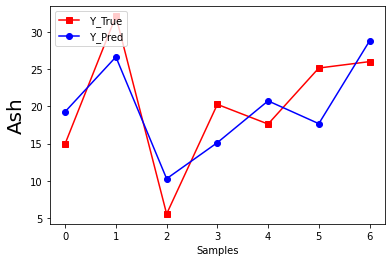

<Figure size 288x288 with 0 Axes>

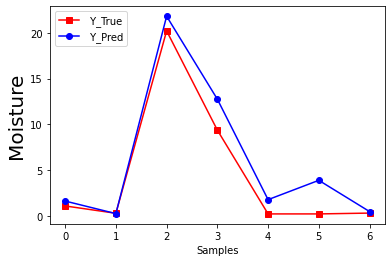

<Figure size 288x288 with 0 Axes>

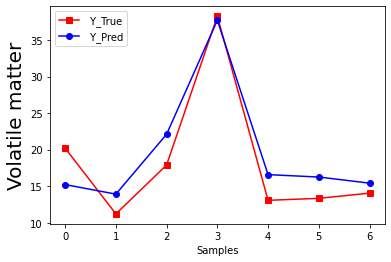

<Figure size 288x288 with 0 Axes>

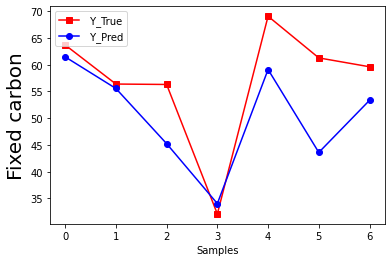

<Figure size 288x288 with 0 Axes>

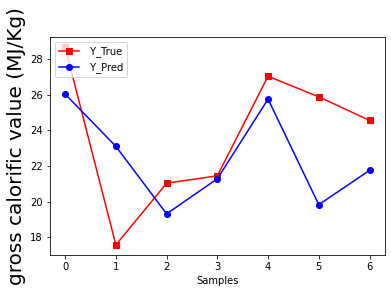

In [ ]:
j=0
for i in Y.columns:
            fig = plt.figure(figsize=(4,4))
            plt.show()       
            plt.plot(np.arange(0,7,1), y_test[0:,j], "-ok", color="r", marker="s", label=" Y_True")
            plt.plot(np.arange(0,7,1), y_pred[0:,j], "-ok", color="b",  marker="o", label=" Y_Pred")
            plt.legend(loc='upper left')
            plt.xlabel("Samples")
            plt.ylabel(i,size=20)
            j= j+1

In [ ]:
base_model = InceptionV3(weights=None, include_top=False, input_shape= (288,288,3))
X =Conv2D(96,(3,3),strides=(1,1))(base_model.get_layer('mixed10').output)
X = BatchNormalization(axis = 3)(X)
X = Activation('relu')(X)
X= Flatten()(X)
model1= Model(base_model.input, outputs=X)

In [ ]:
for i in range(len(model1.layers)):
  model1.layers[i].set_weights(model.layers[i].get_weights())

In [ ]:
X_tr= model1.predict(X_train)
X_te= model1.predict(X_test)
X_tr.shape

(24, 2400)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
maxdepth= [2,3,4,5,6,7,8,9,10,12,14,16,20]
estimators=[5,10,15,20,25,30,40,50]
features= [2,3,4,5,6,7,8,9,10,12,14]

In [ ]:
m=0
flag=1
for depth in maxdepth:
  if flag==0:
    break
  for est in estimators:
    if flag==0:
      break
    for feat in features:
      regr = RandomForestRegressor(max_depth=depth, random_state=None, n_estimators=est, max_features=feat)
      regr.fit(X_tr, y_train)
      y_pred=regr.predict(X_te)
      r2_score=sklearn.metrics.r2_score(y_test,y_pred)
      if (r2_score>max(m,0.8)):
        flag=0
        m= r2_score
        print(m)
        print('depth=', depth)
        print('n_estimator= ', est)
        print('features= ',feat)
        break

0.8511620803360266
depth= 9
n_estimator=  5
features=  8


In [ ]:
y_pred=regr.predict(X_te)
y_pred

array([[18.628     ,  0.466     , 15.558     , 65.348     , 29.10479097],
       [29.862     ,  2.128     , 15.542     , 52.468     , 20.3345538 ],
       [ 9.01      , 20.41      , 19.188     , 51.392     , 22.13657848],
       [16.86      , 11.264     , 34.682     , 37.194     , 22.28284111],
       [18.998     ,  0.576     , 15.59      , 64.836     , 29.19447324],
       [25.23708   ,  0.67      , 18.27      , 55.82292   , 26.24366506],
       [32.21      ,  0.452     , 14.998     , 52.34      , 23.47642091]])

<Figure size 288x288 with 0 Axes>

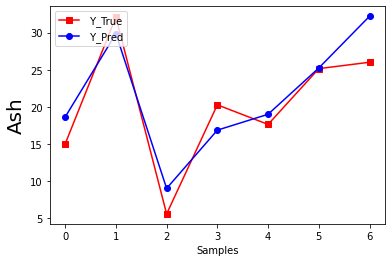

<Figure size 288x288 with 0 Axes>

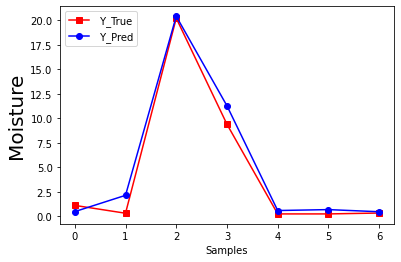

<Figure size 288x288 with 0 Axes>

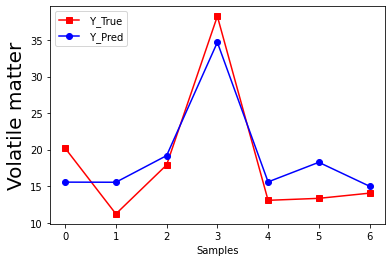

<Figure size 288x288 with 0 Axes>

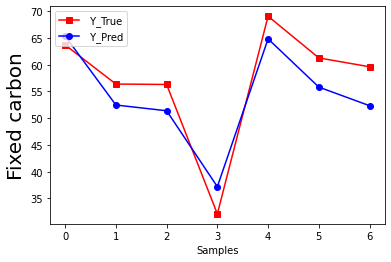

<Figure size 288x288 with 0 Axes>

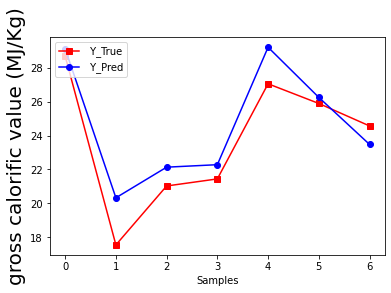

In [ ]:
j=0
for i in Y.columns:
            fig = plt.figure(figsize=(4,4))
            plt.show()       
            plt.plot(np.arange(0,7,1), y_test[0:,j], "-ok", color="r", marker="s", label=" Y_True")
            plt.plot(np.arange(0,7,1), y_pred[0:,j], "-ok", color="b",  marker="o", label=" Y_Pred")
            plt.legend(loc='upper left')
            plt.xlabel("Samples")
            plt.ylabel(i, size=20)
            j= j+1

In [ ]:
r2_score=sklearn.metrics.r2_score(y_test,y_pred)
meansqerr =math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print("R2_score= %f" %(r2_score))
print("Mean Square error= %f" %(meansqerr))

R2_score= 0.851162
Mean Square error= 3.209450


ELM:

In [ ]:
def input_to_hidden(x, Win):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a) # ReLU
    return a

In [ ]:
def inputweight(len, hidden_unit):
  INPUT_LENGHT = len
  HIDDEN_UNITS = hidden_unit
 
  Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
  return Win
#print('Input Weight shape: {shape}'.format(shape=Win.shape))

In [ ]:
def Optimised_weight(x_train, y_train, Win):
  X = input_to_hidden(x_train, Win)
  Xt = np.transpose(X)
  Wout = np.dot(np.linalg.pinv(np.dot(Xt, X)), np.dot(Xt, y_train))
  return Wout

In [ ]:
def predict(x, Wout, Win):
    x = input_to_hidden(x, Win)
    y = np.dot(x, Wout)
    return y

In [ ]:
import sklearn.metrics
import math

In [ ]:
m=0
for i in range(250):
  j= i
  Win= inputweight(X_te.shape[1], j)
  Wout=Optimised_weight(X_tr, y_train, Win)
  y_pred= predict(X_te, Wout, Win)
  r2_score=sklearn.metrics.r2_score(y_test,y_pred)
  if(r2_score>max(m,0.65)):
    m= r2_score
    temp=j
    print(r2_score)
    print(j)
    break

0.6610579635632757
137


In [ ]:
y_pred= predict(X_te, Wout, Win)
y_pred

array([[18.701915655987868, 1.6656333908512553, 16.512432675763076,
        62.31171648625877, 27.285218666359118],
       [30.178215907582217, -0.2509101257470647, 13.465730792022297,
        54.200697980705186, 22.991750289032357],
       [8.064810191027401, 27.107518172305202, 11.819845887041014,
        52.69757516705365, 19.128437526694622],
       [16.569608938953255, 11.614530815111607, 33.62758533603807,
        38.58726703842764, 20.532891133703515],
       [20.220655899318235, 2.324012054118024, 18.001842217451273,
        58.944176392440845, 27.599983119842992],
       [16.03443971090869, 1.4326727906489363, 15.977365107532663,
        49.684124936664176, 21.94749916908178],
       [31.339573082194804, 1.8488487527486335, 14.365289586559479,
        54.82597843995058, 23.387448090957356]], dtype=object)

<Figure size 360x360 with 0 Axes>

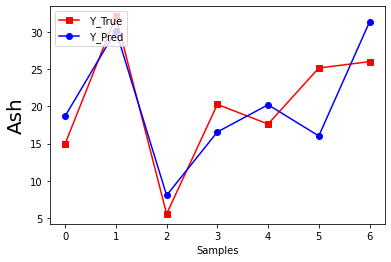

<Figure size 360x360 with 0 Axes>

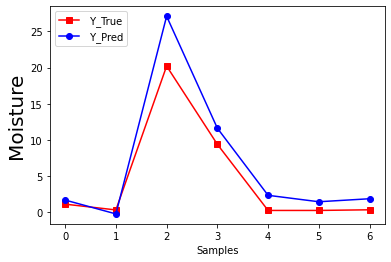

<Figure size 360x360 with 0 Axes>

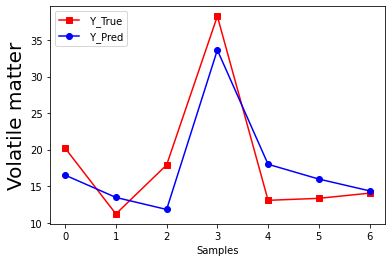

<Figure size 360x360 with 0 Axes>

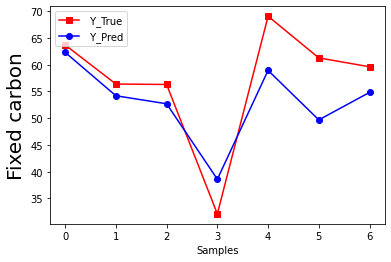

<Figure size 360x360 with 0 Axes>

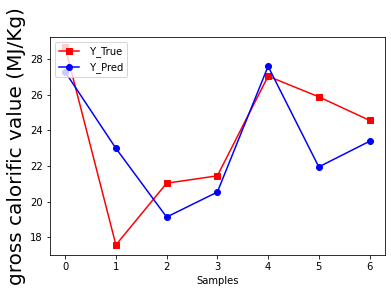

In [ ]:
j=0
for i in Y.columns:
            fig = plt.figure(figsize=(5,5))
            plt.show()          
            plt.plot(np.arange(0,7,1), y_test[0:7,j], "-ok", color="r", marker="s", label=" Y_True")
            plt.plot(np.arange(0,7,1), y_pred[0:7,j], "-ok", color="b",  marker="o", label=" Y_Pred")
            plt.legend(loc='upper left')
            plt.xlabel("Samples")
            plt.ylabel(i, size=20)
            j= j+1

In [ ]:
r2_score=sklearn.metrics.r2_score(y_test,y_pred)
meansqerr =math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Mean Square root error= %f" %(meansqerr))
print('r2_score= ', r2_score)

Mean Square root error= 4.473136
r2_score=  0.6610579635632757
